## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal`
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

### 3. Бинарная классификация

**Задание**
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью левой и правой частей уравнения (4). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание**
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание**
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

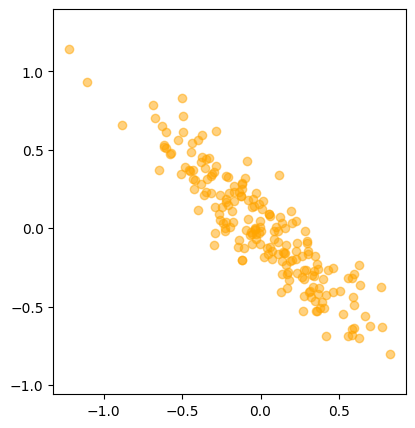

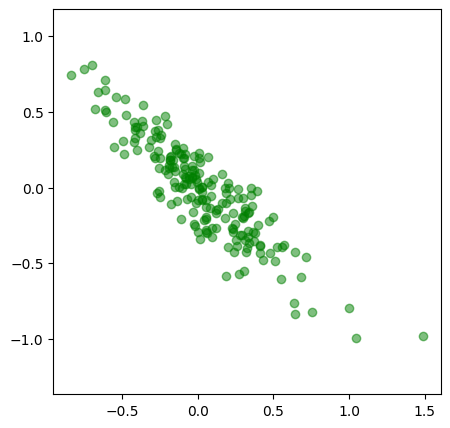

In [6]:
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5

x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2

X = np.concatenate((x1, x2), axis=1)

alpha = np.deg2rad(45)
R = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha),  np.cos(alpha)]])
X_rot = X @ R.T

cov_matrix = np.cov(X_rot.T)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_rot[:, 0], X_rot[:, 1], alpha=0.5, color='orange')
plt.axis('equal')

plt.show()

mean = np.mean(X, axis = 0)
X_mv = np.random.multivariate_normal(mean, cov_matrix, size=M)

plt.figure(figsize=(5, 5))
plt.scatter(X_mv[:, 0], X_mv[:, 1], alpha=0.5, color='green')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


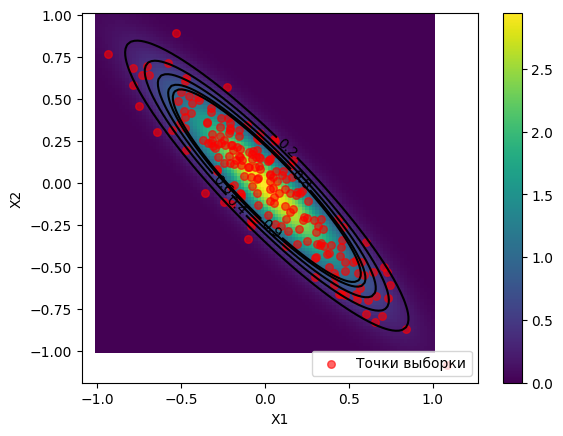

In [30]:
from scipy.stats import multivariate_normal

M = 200
sigma1 = 0.1
sigma2 = 0.5


x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2


X = np.concatenate((x1, x2), axis=1)

alpha = np.deg2rad(45)
R = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha),  np.cos(alpha)]])
X_rot = X @ R.T

mu = np.mean(X_rot, axis=0)
C = np.cov(X_rot.T)


xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mu, C)
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)


plt.scatter(X_rot[:,0], X_rot[:,1], c='red', s=30, alpha=0.6, label='Точки выборки')


plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


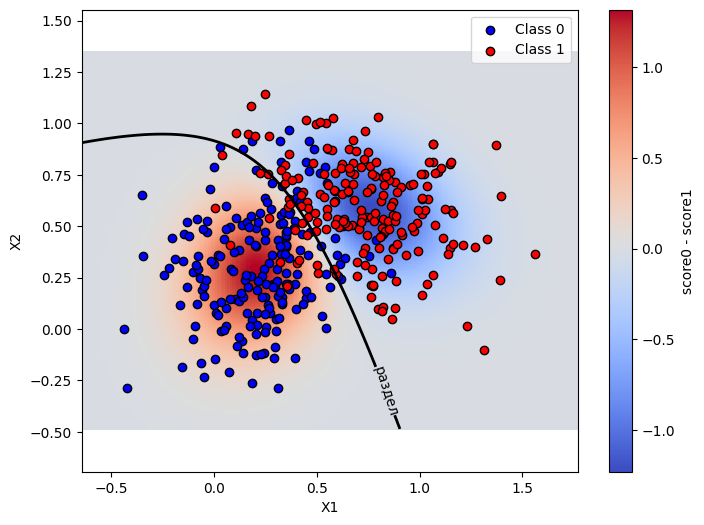

In [28]:
M = 200

mu0_true = [0.2, 0.3]
C0_true = [[0.05, 0.02], [0.02, 0.08]]
X0 = np.random.multivariate_normal(mu0_true, C0_true, M)
y0 = np.zeros(M)


mu1_true = [0.7, 0.6]
C1_true = [[0.08, -0.02], [-0.02, 0.05]]
X1 = np.random.multivariate_normal(mu1_true, C1_true, M)
y1 = np.ones(M)

X = np.vstack((X0, X1))
y = np.concatenate((y0, y1))


mu0 = np.mean(X[y==0], axis=0)
mu1 = np.mean(X[y==1], axis=0)
C0 = np.cov(X[y==0].T)
C1 = np.cov(X[y==1].T)


p0 = np.mean(y==0)
p1 = np.mean(y==1)


xx = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 200)
yy = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 200)
XX, YY = np.meshgrid(xx, yy)
points = np.stack((XX.flatten(), YY.flatten()), axis=1)

rv0 = multivariate_normal(mean=mu0, cov=C0)
rv1 = multivariate_normal(mean=mu1, cov=C1)

score0 = rv0.pdf(points) * p0
score1 = rv1.pdf(points) * p1


Z = (score0 - score1).reshape(XX.shape)


plt.figure(figsize=(8,6))


plt.pcolor(XX, YY, Z, shading='auto', cmap='coolwarm')
plt.colorbar(label='score0 - score1')


CS = plt.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
plt.clabel(CS, fmt='раздел', fontsize=10)


plt.scatter(X0[:,0], X0[:,1], c='blue', edgecolor='k', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', edgecolor='k', label='Class 1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


In [13]:
from sklearn.base import BaseEstimator
class myLDA(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
      self.p0 = np.mean(y == 0)
      self.p1 = np.mean(y == 1)

      self.mu0 = np.mean(X[y==0], axis=0)
      self.mu1 = np.mean(X[y==1], axis=0)

      X0_centred = X[y==0] - self.mu0
      X1_centred = X[y==1] - self.mu1

      C = (X0_centred.T@X0_centred + X1_centred.T@X1_centred)/(len(X)-2)
      self.C_inv = np.linalg.inv(C)

      self.w = self.C_inv @ (self.mu0 - self.mu1)
      self.b = -0.5 * (self.mu0 @ self.C_inv @ self.mu0 - self.mu1 @ self.C_inv @ self.mu1) + np.log(self.p0/self.p1)



    def predict(self, X):
      scores = X @ self.w + self.b
      return (scores < 0).astype(int)

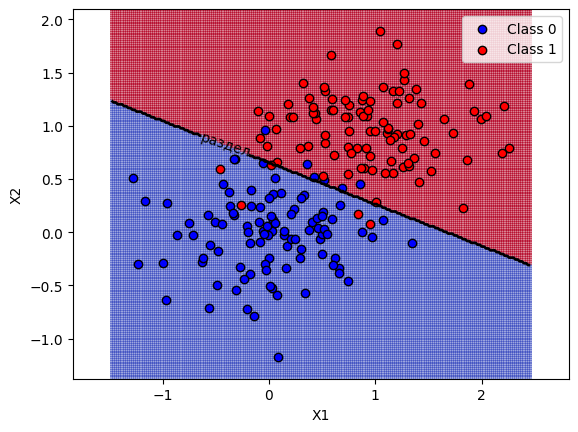

In [25]:
M = 100
X0 = np.random.multivariate_normal([0,0], [[0.3,0],[0,0.1]], M)
X1 = np.random.multivariate_normal([1,1], [[0.3,0],[0,0.1]], M)
X = np.vstack((X0, X1))
y = np.concatenate((np.zeros(M), np.ones(M)))

lda = myLDA()
lda.fit(X, y)

xx = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 200)
yy = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 200)
XX, YY = np.meshgrid(xx, yy)
points = np.c_[XX.ravel(), YY.ravel()]

Z = lda.predict(points).reshape(XX.shape)



plt.pcolor(XX, YY, Z, cmap='coolwarm', alpha=0.5)
CS = plt.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
plt.clabel(CS, fmt='раздел', fontsize=10)

plt.scatter(X0[:,0], X0[:,1], c='blue', edgecolor='k', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', edgecolor='k', label='Class 1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


In [17]:
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.classes = None
        self.means = {}
        self.vars = {}
        self.p_y = {}
        self.log_p_y = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y == c]
            self.p_y[c] = np.mean(y == c)
            self.means[c] = np.mean(X_c, axis=0)
            self.vars[c] = np.var(X_c, axis=0)
            self.log_p_y[c] = np.log(self.p_y[c])

    def predict_line(self, X):

        probs = []
        for x in X:
            scores = []
            for c in self.classes:
                part1 = -0.5 * np.sum(np.log(2 * np.pi * self.vars[c]))
                part2 = -0.5 * np.sum((x - self.means[c])**2 / self.vars[c])
                part3 = part1 + part2 + self.log_p_y[c]
                scores.append(part3)
            probs.append(scores)
        return np.array(probs)

    def predict(self, X):
        scores = self.predict_proba(X)
        return np.argmax(scores, axis=1)


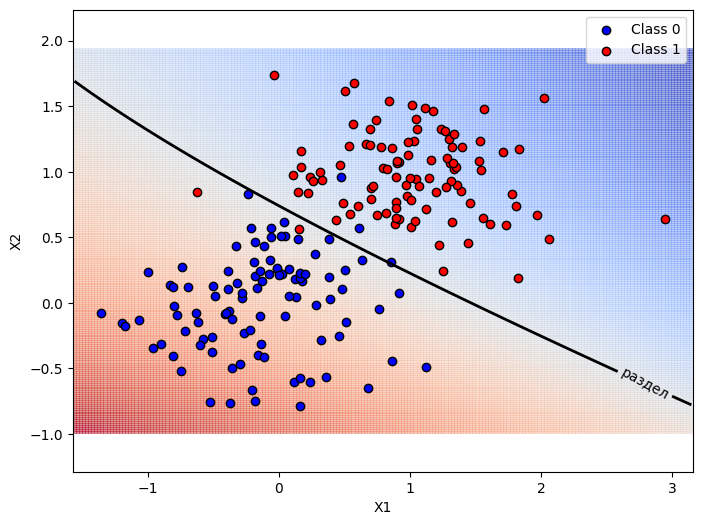

In [24]:
M = 100
X0 = np.random.multivariate_normal([0,0], [[0.3,0],[0,0.1]], M)
X1 = np.random.multivariate_normal([1,1], [[0.3,0],[0,0.1]], M)
X = np.vstack((X0, X1))
y = np.concatenate((np.zeros(M), np.ones(M)))

nb = myNB()
nb.fit(X, y)

xx = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 200)
yy = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 200)
XX, YY = np.meshgrid(xx, yy)
points = np.c_[XX.ravel(), YY.ravel()]

Z = nb.predict_line(points)
Z = (Z[:,0] - Z[:,1]).reshape(XX.shape)

plt.figure(figsize=(8,6))
plt.pcolor(XX, YY, Z, cmap='coolwarm', alpha=0.5)
CS = plt.contour(XX, YY, Z, levels=[0], colors='k', linewidths=2)
plt.clabel(CS, fmt='раздел', fontsize=10)

plt.scatter(X0[:,0], X0[:,1], c='blue', edgecolor='k', label='Class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', edgecolor='k', label='Class 1')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


lda = myLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)


print("NB:", accuracy_score(y_test, y_pred_nb),
      precision_score(y_test, y_pred_nb),
      recall_score(y_test, y_pred_nb))

print("LDA:", accuracy_score(y_test, y_pred_lda),
      precision_score(y_test, y_pred_lda),
      recall_score(y_test, y_pred_lda))


NB: 0.86 0.8461538461538461 0.88
LDA: 0.86 0.875 0.84


Оба алгоритма — LDA и Naive Bayes — показали сопоставимые результаты по accuracy. При этом LDA демонстрирует более высокую точность , что означает меньшую долю ложных срабатываний. В то же время Naive Bayes показывает лучшую полноту, то есть реже пропускает объекты положительного класса. Таким образом, выбор метода зависит от задачи: LDA предпочтителен, когда критична точность классификации, а NB — когда важно минимизировать пропуски.